# Data division Try 


In [1]:
import numpy as np
import os
import PIL
import PIL.Image
import tensorflow as tf


import pathlib
import pandas as pd

import pydicom # for DICOM images
from skimage.transform import resize

import matplotlib.pyplot as plt
from matplotlib import gridspec
%matplotlib inline

In [2]:
print(tf.__version__)

2.6.0


In [3]:
def set_seed(seed=31415):
    np.random.seed(seed)
    tf.random.set_seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    os.environ['TF_DETERMINISTIC_OPS'] = '1'
set_seed()

In [4]:
# Directory
directory = '/Users/renau/Desktop/DATA/data_proj_melanoma'

# Import the 2 csv s
train_df = pd.read_csv(directory + '/train.csv')
test_df = pd.read_csv(directory + '/test.csv')

print('Train has {:,} rows and Test has {:,} rows.'.format(len(train_df), len(test_df)))

# Change columns names
new_names = ['dcm_name', 'ID', 'sex', 'age', 'anatomy', 'diagnosis', 'benign_malignant', 'target']
train_df.columns = new_names
test_df.columns = new_names[:5]

Train has 33,126 rows and Test has 10,982 rows.


In [5]:
# === DICOM ===
# Create the paths
path_train = directory + '/train/' + train_df['dcm_name'] + '.dcm'
path_test = directory + '/test/' + test_df['dcm_name'] + '.dcm'

# Append to the original dataframes
train_df['path_dicom'] = path_train
test_df['path_dicom'] = path_test

# === JPEG ===
# Create the paths
path_train = directory + '/jpeg/train/' + train_df['dcm_name'] + '.jpg'
path_test = directory + '/jpeg/test/' + test_df['dcm_name'] + '.jpg'

# Append to the original dataframes
train_df['path_jpeg'] = path_train
test_df['path_jpeg'] = path_test

In [6]:
malignant_df = train_df[train_df['target'] == 1]
malignant_df.head()

,dcm_name,ID,sex,age,anatomy,diagnosis,benign_malignant,target,path_dicom,path_jpeg
91,ISIC_0149568,IP_0962375,female,55.0,upper extremity,melanoma,malignant,1,/Users/renau/Desktop/DATA/data_proj_melanoma/t...,/Users/renau/Desktop/DATA/data_proj_melanoma/j...
235,ISIC_0188432,IP_0135517,female,50.0,upper extremity,melanoma,malignant,1,/Users/renau/Desktop/DATA/data_proj_melanoma/t...,/Users/renau/Desktop/DATA/data_proj_melanoma/j...
314,ISIC_0207268,IP_7735373,male,55.0,torso,melanoma,malignant,1,/Users/renau/Desktop/DATA/data_proj_melanoma/t...,/Users/renau/Desktop/DATA/data_proj_melanoma/j...
399,ISIC_0232101,IP_8349964,male,65.0,torso,melanoma,malignant,1,/Users/renau/Desktop/DATA/data_proj_melanoma/t...,/Users/renau/Desktop/DATA/data_proj_melanoma/j...
459,ISIC_0247330,IP_3232631,female,65.0,lower extremity,melanoma,malignant,1,/Users/renau/Desktop/DATA/data_proj_melanoma/t...,/Users/renau/Desktop/DATA/data_proj_melanoma/j...


In [7]:
benin_df = train_df[train_df['target'] == 0]
benin_df.head()

,dcm_name,ID,sex,age,anatomy,diagnosis,benign_malignant,target,path_dicom,path_jpeg
0,ISIC_2637011,IP_7279968,male,45.0,head/neck,unknown,benign,0,/Users/renau/Desktop/DATA/data_proj_melanoma/t...,/Users/renau/Desktop/DATA/data_proj_melanoma/j...
1,ISIC_0015719,IP_3075186,female,45.0,upper extremity,unknown,benign,0,/Users/renau/Desktop/DATA/data_proj_melanoma/t...,/Users/renau/Desktop/DATA/data_proj_melanoma/j...
2,ISIC_0052212,IP_2842074,female,50.0,lower extremity,nevus,benign,0,/Users/renau/Desktop/DATA/data_proj_melanoma/t...,/Users/renau/Desktop/DATA/data_proj_melanoma/j...
3,ISIC_0068279,IP_6890425,female,45.0,head/neck,unknown,benign,0,/Users/renau/Desktop/DATA/data_proj_melanoma/t...,/Users/renau/Desktop/DATA/data_proj_melanoma/j...
4,ISIC_0074268,IP_8723313,female,55.0,upper extremity,unknown,benign,0,/Users/renau/Desktop/DATA/data_proj_melanoma/t...,/Users/renau/Desktop/DATA/data_proj_melanoma/j...


In [8]:
"""file_paths = train_df['path_jpeg'].values
labels = train_df['target'].values
train_ds = tf.data.Dataset.from_tensor_slices((file_paths, labels))"""

"file_paths = train_df['path_jpeg'].values\nlabels = train_df['target'].values\ntrain_ds = tf.data.Dataset.from_tensor_slices((file_paths, labels))"

In [9]:
mal_file = malignant_df['path_jpeg'].values
mal_labels = malignant_df['target'].values
mal_train_ds = tf.data.Dataset.from_tensor_slices((mal_file, mal_labels))
len(list(mal_train_ds))

584

In [10]:
ben_file = benin_df['path_jpeg'].values
ben_labels = benin_df['target'].values
ben_train_ds = tf.data.Dataset.from_tensor_slices((ben_file, ben_labels))
len(list(ben_train_ds))

32542

In [11]:
benPart_train_ds = ben_train_ds.take(len(list(mal_train_ds)))
#benPart_train_ds = ben_train_ds.take(15000)
len(list(benPart_train_ds))

584

In [12]:
train_ds = mal_train_ds.concatenate(benPart_train_ds)
#train_ds = ben_train_ds.take(1000)
shuf_train_ds = train_ds.shuffle(len(list(train_ds)))
len(list(shuf_train_ds))

1168

In [13]:
ex_ds = shuf_train_ds.take(3)
for element in ex_ds :
    print(element[0].numpy(),'and target: ',element[1].numpy())

b'/Users/renau/Desktop/DATA/data_proj_melanoma/jpeg/train/ISIC_0185177.jpg' and target:  0
b'/Users/renau/Desktop/DATA/data_proj_melanoma/jpeg/train/ISIC_8521610.jpg' and target:  1
b'/Users/renau/Desktop/DATA/data_proj_melanoma/jpeg/train/ISIC_0103298.jpg' and target:  0


In [14]:
def read_image(path, label):
    image = tf.io.read_file(path)
    image = tf.image.decode_image(image, channels=3, dtype = tf.uint8, expand_animations = False)
    return image, label
dstry = shuf_train_ds.map(read_image)
ds_vali = ben_train_ds.skip(1500)
ds_val = ds_vali.take(200).map(read_image)

In [15]:
ex_ds = dstry.take(3)
for element in ex_ds :
    print(element[0].numpy().shape)

(1936, 2592, 3)
(1936, 2592, 3)
(2448, 3264, 3)


In [16]:
def adapt_data(image, label):
    image = tf.image.resize(image, [128,128])
    return image, label

def convert_to_float(image, label):
    image = tf.image.convert_image_dtype(image, dtype=tf.float64)
    return image, label
    
ds_train= dstry.map(adapt_data).map(convert_to_float).batch(32)
ds_val= ds_val.map(adapt_data).map(convert_to_float).batch(32)

ex_ds = ds_train.take(3)
for element in ex_ds :
    print(element[0].shape)
    print(element[1].shape)

(32, 128, 128, 3)
(32,)
(32, 128, 128, 3)
(32,)
(32, 128, 128, 3)
(32,)


In [17]:
AUTOTUNE = tf.data.AUTOTUNE

ds_train = ds_train.cache().prefetch(buffer_size=AUTOTUNE)
ds_val = ds_val.cache().prefetch(buffer_size=AUTOTUNE)

In [18]:
from tensorflow import keras
from tensorflow.keras import layers

model = tf.keras.Sequential([
  tf.keras.layers.Rescaling(1./255),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(16, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(8, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(1,activation='sigmoid')
])

In [19]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(epsilon=0.01),
    loss='binary_crossentropy',
    metrics=['binary_accuracy']
)

In [20]:
history = model.fit(
    ds_train,
    validation_data=ds_val,
    epochs=50,
)

Epoch 1/50
37/37 [==============================] - 10s 178ms/step - loss: 0.6885 - binary_accuracy: 0.5265 - val_loss: 0.5847 - val_binary_accuracy: 1.0000
Epoch 2/50
37/37 [==============================] - 1s 15ms/step - loss: 0.6764 - binary_accuracy: 0.5479 - val_loss: 0.6396 - val_binary_accuracy: 0.7450
Epoch 3/50
37/37 [==============================] - 0s 10ms/step - loss: 0.6584 - binary_accuracy: 0.5933 - val_loss: 0.5649 - val_binary_accuracy: 0.7800
Epoch 4/50
37/37 [==============================] - 0s 10ms/step - loss: 0.6350 - binary_accuracy: 0.6361 - val_loss: 0.7597 - val_binary_accuracy: 0.5050
Epoch 5/50
37/37 [==============================] - 0s 10ms/step - loss: 0.6270 - binary_accuracy: 0.6455 - val_loss: 0.7253 - val_binary_accuracy: 0.5500
Epoch 6/50
37/37 [==============================] - 0s 10ms/step - loss: 0.6158 - binary_accuracy: 0.6601 - val_loss: 0.7375 - val_binary_accuracy: 0.5200
Epoch 7/50
37/37 [==============================] - 0s 11ms/step - l

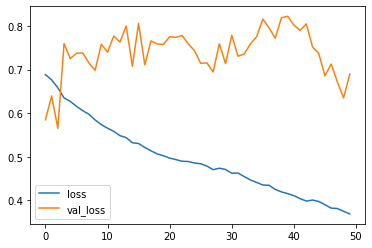

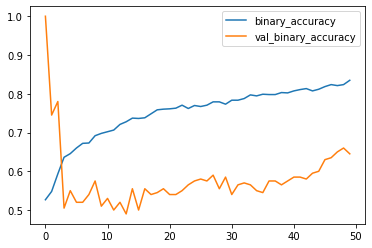

In [21]:
import pandas as pd
history_frame = pd.DataFrame(history.history)
history_frame.loc[:, ['loss', 'val_loss']].plot()
history_frame.loc[:, ['binary_accuracy', 'val_binary_accuracy']].plot();

In [25]:
predictions = model.predict(ds_val)

b =0
m = 0
u = 0
for element in predictions :
    if(element[0] > 0.95) :
        m +=1
    elif(element[0]< 0.05) :
        b +=1
    else :
        u +=1
        
print("Prédictions ;\n - Malin(s): ", m, "\n - Bénins: ", b, "\n - Doutes: ", u, "\n - Totale comp: ", b+u+m," vs ",len(predictions))

Prédictions ;
 - Malin(s):  4 
 - Bénins:  38 
 - doutes:  158 
 - Totale comp:  200  vs  200
